# **Part A: Word Embeddings with Word2Vec**

In [44]:
import nltk
import numpy as np
import string
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('stopwords')
from nltk.corpus import gutenberg
austen = gutenberg.sents('austen-sense.txt')+gutenberg.sents('austen-emma.txt')+gutenberg.sents('austen-persuasion.txt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(len(austen))

16463


In [ ]:
austen[:3]

[['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'],
 ['CHAPTER', '1'],
 ['The',
  'family',
  'of',
  'Dashwood',
  'had',
  'long',
  'been',
  'settled',
  'in',
  'Sussex',
  '.']]

In [ ]:
from tensorflow.keras import preprocessing 
from nltk.corpus import stopwords 
import re
stop_words = set(stopwords.words('english')) 
nltk.download('stopwords')
normalized_corpus_temp = []
text = [token for alist in austen for token in alist ]
for tokenList in austen:
    normalisedTokenList = preprocessing.text.text_to_word_sequence(' '.join(tokenList), filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
    normalisedTokenList = [w for w in normalisedTokenList if not w in stop_words]
    normalisedTokenList = [w for w in normalisedTokenList if not w in string.punctuation]
    normalisedTokenList = [w for w in normalisedTokenList if not re.search(r'\d',w) ]
    
    normalized_corpus_temp.append(normalisedTokenList)
normalized_corpus = [' '.join(w) for w in normalized_corpus_temp if w and len(w) > 3]
normalized_corpus_tokens = [w for w in normalized_corpus_temp if w and len(w) > 3]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(normalized_corpus)

12498

In [ ]:
normalized_corpus[10]

'therefore succession norland estate really important sisters fortune independent might arise father inheriting property could small'

In [ ]:
import collections, itertools
word_counter = collections.Counter(list(itertools.chain.from_iterable(normalized_corpus_tokens)))
len(set(list(itertools.chain.from_iterable(normalized_corpus_tokens))))

10038

In [ ]:
word_ids = list(set(list(itertools.chain.from_iterable(normalized_corpus_tokens))))

In [ ]:
word2idx = {}
word2idx = {token:id+1 for id,token in enumerate(word_ids)}
idx2word = {v: k for k,v in word2idx.items()}

In [ ]:
sents_as_ids = []
for i in range(len(normalized_corpus_tokens)):
    sents_as_ids.append([word2idx[j] for j in normalized_corpus_tokens[i]])
vocab_size = len(word_ids) + 1
embed_size = 100

In [ ]:
print('Number of unique words:', len(word_ids))
word_ids[0:10]

Number of unique words: 10038


['agricultural',
 'enumeration',
 'share',
 'habitation',
 'impending',
 'sample',
 'unexhilarating',
 'boils',
 'clearest',
 'note']

In [ ]:
print('\nSample word2idx: ', list(word2idx.items())[:10])


Sample word2idx:  [('agricultural', 1), ('enumeration', 2), ('share', 3), ('habitation', 4), ('impending', 5), ('sample', 6), ('unexhilarating', 7), ('boils', 8), ('clearest', 9), ('note', 10)]


In [ ]:
print('\nSample idx2word:', list(idx2word.items())[:10])


Sample idx2word: [(1, 'agricultural'), (2, 'enumeration'), (3, 'share'), (4, 'habitation'), (5, 'impending'), (6, 'sample'), (7, 'unexhilarating'), (8, 'boils'), (9, 'clearest'), (10, 'note')]


In [ ]:
print('\nSample normalized corpus:', normalized_corpus[:3])


Sample normalized corpus: ['sense sensibility jane austen', 'family dashwood long settled sussex', 'estate large residence norland park centre property many generations lived respectable manner engage general good opinion surrounding acquaintance']


In [ ]:
print('\nAbove sentence as a list of ids:' , sents_as_ids[:30])


Above sentence as a list of ids: [[8252, 5848, 4618, 2226], [8480, 870, 2603, 2529, 4989], [9449, 4461, 84, 8766, 1738, 5557, 4215, 9790, 6997, 75, 2129, 3415, 9197, 8346, 9845, 4549, 3801, 3649], [3125, 6446, 9449, 8214, 4846, 75, 10034, 8062, 9790, 3019, 5669, 3793, 2123, 456, 815], [3996, 2114, 2557, 3019, 6138, 7570, 9469, 2707, 6447, 4427, 5412, 8291, 310, 8480, 118, 7967, 6753, 870, 154, 805, 8766, 9449, 829, 3816, 168], [3593, 118, 9099, 8227, 1879, 5992, 928, 5159, 2230], [3793, 6751, 7967, 6303, 6753, 870, 6064, 1337, 2567, 2070, 8425, 6789, 1520, 3488, 9467, 363, 14, 8062, 4214, 3764, 1367, 8227, 1763, 1401, 8551], [9314, 9771, 7967, 6753, 870, 2735, 1907, 5834, 5200, 799, 9417], [1907, 7889, 2129, 6739, 4846, 738, 1027, 9697, 941, 4461, 6019, 9737, 7921, 8062], [9771, 2282, 2114, 4580, 5526, 1763, 9450], [4253, 638, 8766, 9449, 8078, 2311, 1222, 9697, 2525, 1674, 9591, 7862, 6914, 4215, 4214, 7696], [941, 9287, 7862, 1726, 61, 561, 122, 5013, 8812, 8092, 7066, 9697, 7653, 1

In [ ]:
from keras.preprocessing.sequence import skipgrams
skip_grams=[skipgrams(sent, vocabulary_size=vocab_size, window_size=5, negative_samples=1.0) for sent in sents_as_ids]

In [ ]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(len(pairs)):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        # the first word and its index
        idx2word[pairs[i][0]], pairs[i][0],
        # the second word and its index
        idx2word[pairs[i][1]], pairs[i][1],
        # the label
        labels[i]))

(sense (8252), chooses (4755)) -> 0
(sense (8252), austen (2226)) -> 1
(sensibility (5848), quarters (3303)) -> 0
(sensibility (5848), forgiven (2400)) -> 0
(austen (2226), answer (3293)) -> 0
(austen (2226), jane (4618)) -> 1
(austen (2226), frightens (5022)) -> 0
(jane (4618), unforeseen (7717)) -> 0
(jane (4618), sensibility (5848)) -> 1
(jane (4618), claiming (2514)) -> 0
(austen (2226), sensibility (5848)) -> 1
(sense (8252), sensibility (5848)) -> 1
(jane (4618), sense (8252)) -> 1
(jane (4618), accept (7387)) -> 0
(sensibility (5848), keenly (2260)) -> 0
(sense (8252), jane (4618)) -> 1
(sensibility (5848), sense (8252)) -> 1
(austen (2226), sense (8252)) -> 1
(sensibility (5848), austen (2226)) -> 1
(sensibility (5848), jane (4618)) -> 1
(sense (8252), untried (5261)) -> 0
(jane (4618), austen (2226)) -> 1
(austen (2226), firmer (3645)) -> 0
(sense (8252), freshened (2651)) -> 0


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers import Embedding
from keras.models import Model
from keras.utils import plot_model

In [ ]:
target_word = Input((1,), dtype='int32')
target_embedding = Embedding(vocab_size,
                             embed_size,
                             name='target_embed_layer',
                             embeddings_initializer='glorot_uniform',
                             input_length=1)(target_word)
target_input = Reshape((embed_size,))(target_embedding)

In [ ]:
context_word = Input((1,), dtype='int32')
context_embedding = Embedding(vocab_size,
                              embed_size,
                              name='context_embed_layer',
                              embeddings_initializer='glorot_uniform',
                              input_length=1)(context_word)
context_input = Reshape((embed_size,))(context_embedding)

In [ ]:
merged_inputs = Dot(axes=-1, normalize=False)([target_input, context_input])
label = Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform')(merged_inputs)
model=Model(inputs=[target_word,context_word],outputs=[label])
model.compile(loss = 'mean_squared_error',
              optimizer = 'rmsprop')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 target_embed_layer (Embedding)  (None, 1, 100)      1003900     ['input_2[0][0]']                
                                                                                                  
 context_embed_layer (Embedding  (None, 1, 100)      1003900     ['input_3[0][0]']                
 )                                                                                            

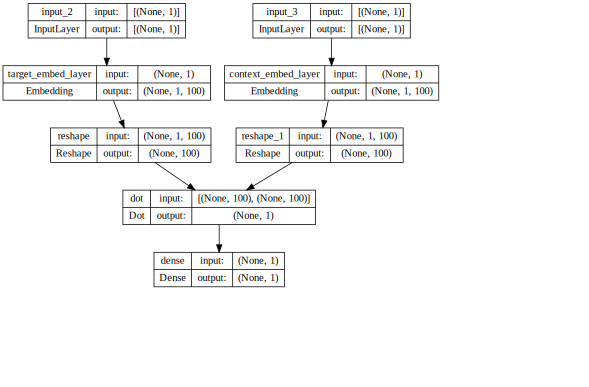

In [ ]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True,show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
for epoch in range(1,25):
    epoch_loss = 0
    for i,sent_examples in enumerate(skip_grams):
        target_wds = np.array([pair[0] for pair in sent_examples[0]],dtype='int32')
        context_wds = np.array([pair[1] for pair in sent_examples[0]],dtype='int32')
        labels = np.array(sent_examples[1],dtype='int32')
        X = [target_wds,context_wds]
        Y = labels
        if i%5000 == 0:
            print('processed %d sentences' %i)
        epoch_loss += model.train_on_batch(X,Y)
    print('Processec all %d sentences' %i)
    print('Epoch:',epoch,'Loss:',epoch_loss,'\n')

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 1 Loss: 1426.085158484755 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 2 Loss: 1336.4173326317687 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 3 Loss: 1254.0799708422273 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 4 Loss: 1179.6926900778926 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 5 Loss: 1113.3071322288451 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 6 Loss: 1054.4178396780844 

processed 0 sentences
processed 5000 sentences
processed 10000 sentences
Processec all 12497 sentences
Epoch: 7 Loss: 1002.5160635501561 

processed 0 sentences
proces

In [ ]:
word_embeddings = model.get_layer('target_embed_layer').get_weights()[0][1:]

In [ ]:
import pandas as pd
pd.DataFrame(word_embeddings, index=list(idx2word.values())).head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
agricultural,-0.050827,-0.000346,-0.014999,-0.024274,0.032542,0.013817,-0.059165,-0.021513,0.007517,0.019252,...,-0.031464,-0.042933,0.005628,-0.041081,0.005538,0.022631,-0.021019,-0.026228,0.003599,-0.027970
enumeration,-0.016764,0.018393,-0.014047,-0.036145,0.014646,0.050686,-0.029557,-0.052179,0.004057,0.001493,...,-0.031689,0.015061,0.009161,-0.021850,0.017837,-0.008296,-0.019477,-0.007586,0.016316,-0.046000
share,0.132191,-0.105709,0.113350,-0.014739,0.095044,0.149274,0.371555,-0.087336,-0.030958,0.158967,...,-0.116749,-0.021493,-0.141666,0.179021,0.037375,-0.203107,-0.075567,-0.049841,0.099014,0.090929
habitation,-0.037607,-0.037124,-0.007126,0.004274,-0.063412,0.021302,0.039118,-0.023034,-0.126960,0.078550,...,-0.013774,-0.106529,0.033974,-0.016205,0.097828,0.042515,-0.029643,-0.005376,-0.013291,0.035355
impending,-0.029901,0.000949,0.006445,-0.062367,0.006158,-0.009940,-0.060981,-0.010933,-0.046151,0.061576,...,0.011270,-0.049404,-0.006460,-0.007793,-0.025373,-0.000437,-0.047253,-0.008952,0.064518,-0.034867
sample,0.024184,-0.001557,-0.035046,-0.005544,0.041931,0.028603,-0.042631,-0.012820,-0.020909,0.038535,...,-0.030447,-0.052490,0.002918,-0.004359,0.040297,0.014478,-0.012878,-0.038558,0.007218,-0.015872
unexhilarating,0.002843,-0.037773,-0.048014,-0.072212,0.001170,-0.003389,-0.016003,-0.048277,-0.013797,-0.007345,...,-0.012586,-0.009941,0.038458,0.002553,0.037401,0.061126,0.005608,-0.001417,0.000334,-0.004846
boils,-0.002897,0.008363,-0.012954,-0.002966,0.006714,0.008126,-0.022727,-0.021139,-0.025995,0.010293,...,-0.014487,-0.001079,0.035845,-0.023560,0.024513,0.042954,-0.012822,-0.003104,0.012092,-0.007025
clearest,-0.004789,-0.003221,-0.019409,-0.041609,0.034804,0.018842,-0.073023,-0.033172,-0.040464,0.102871,...,-0.071759,-0.038551,0.026810,-0.034585,0.031578,0.041342,-0.019054,0.000160,0.010955,-0.016434
note,-0.256145,-0.093022,0.057054,-0.118053,-0.234950,-0.081610,0.269425,0.102358,-0.107117,0.164633,...,0.033571,0.141801,0.240076,0.132685,0.048856,-0.041046,0.204019,-0.020787,0.095493,-0.102738


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(word_embeddings)

In [ ]:
search_terms = ['man', 'love', 'hatred', 'woman', 'wisdom',  'kindness', 'god', 'man', 'folly', 'fool']

In [ ]:
similar_words = {term: [idx2word[idx]
                        for idx in (-1 * similarity_matrix[word2idx[term]-1]).argsort()[1:6] + 1]
                        for term in search_terms}

In [ ]:
print(similar_words)

{'man': ['amiable', 'lives', 'avarice', 'respectable', 'boarder'], 'love': ['used', 'hoped', 'excepting', 'unconcerned', 'opposing'], 'hatred': ['sophys', 'bountiful', 'swisserland', 'maker', 'reclaim'], 'woman': ['amiable', 'arguments', 'bad', 'excited', 'sincerity'], 'wisdom': ['edition', 'nuncheon', 'adventurous', 'minced', 'gibson'], 'kindness': ['invited', 'desired', 'disappointed', 'safely', 'midsummer'], 'god': ['refreshed', 'celebrated', 'equivocation', 'palm', 'clamour'], 'folly': ['applied', 'misunderstood', 'unworthy', 'top', 'uprightness'], 'fool': ['providing', 'powerfully', 'blooming', 'permitting', 'genteelly']}


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


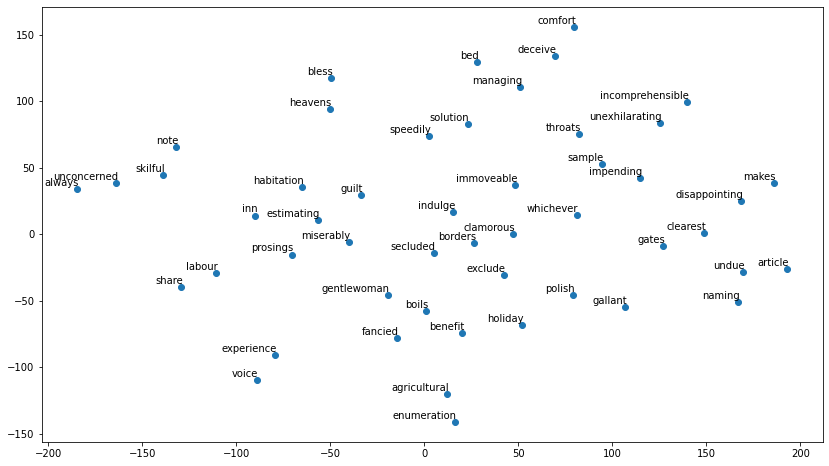

In [ ]:
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50
T = tsne.fit_transform(word_embeddings[:plot_only, :])
labels = [idx2word[i+1] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')

# **Part B: Using LSTMs for Text Classification**

In [62]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
imdb = keras.datasets.imdb

In [63]:
VOCAB_SIZE = 10000

In [64]:
INDEX_FROM = 3
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,index_from=INDEX_FROM)

17464789/17464789 [==============================] - 0s 0us/step


In [65]:
print('\n Sample label:', test_labels[1])


 Sample label: 1


In [66]:
print('Sample review:', train_data[0])

Sample review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [67]:
from tensorflow.keras.utils import pad_sequences
MAXIMUM_LENGTH = 500
preprocessed_train_data = pad_sequences(train_data,maxlen=MAXIMUM_LENGTH)
processed_test_data = pad_sequences(test_data,maxlen=MAXIMUM_LENGTH)

In [68]:
print('Length of sample train_data before preprocessing:', len(train_data[1]), type(train_data[1]))
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]), type(preprocessed_train_data[1]))

Length of sample train_data before preprocessing: 189 <class 'list'>
Length of sample train_data after preprocessing: 500 <class 'numpy.ndarray'>


In [69]:
model = Sequential()
EMBED_SIZE = 100
model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1,activation='sigmoid',input_shape=(1,)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [70]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


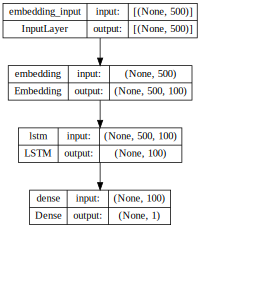

In [71]:
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [72]:
history = model.fit(preprocessed_train_data,
                    train_labels,
                    epochs=3,
                    batch_size=512,
                    validation_split=0.08,
                    verbose=1)

Epoch 1/3
45/45 [==============================] - 139s 3s/step - loss: 0.5990 - accuracy: 0.6915 - val_loss: 0.4496 - val_accuracy: 0.8280
Epoch 2/3
45/45 [==============================] - 134s 3s/step - loss: 0.3320 - accuracy: 0.8664 - val_loss: 0.3106 - val_accuracy: 0.8740
Epoch 3/3
45/45 [==============================] - 134s 3s/step - loss: 0.2117 - accuracy: 0.9217 - val_loss: 0.2977 - val_accuracy: 0.8805


In [73]:
results = model.evaluate(processed_test_data, test_labels)

782/782 [==============================] - 70s 89ms/step - loss: 0.2982 - accuracy: 0.8770


In [74]:
print(results)

[0.2982371151447296, 0.8770400285720825]


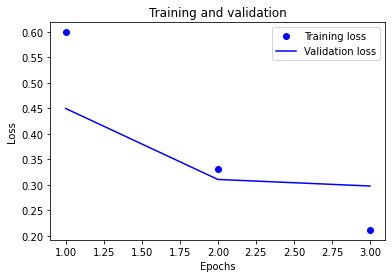

In [75]:
history_dict = history.history

# acc = history_dict['acc']
# val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [82]:
embed_layer = model.get_layer('embedding').get_weights()[0]

In [83]:
print('Shape of word_embeddings:', embed_layer.shape)

Shape of word_embeddings: (10000, 100)


In [84]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
word2idx = imdb.get_word_index()
word2idx = {k:(v+INDEX_FROM) for k,v in word2idx.items() if v < 9998}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2
word2idx["<OTH>"] = 3

1641221/1641221 [==============================] - 0s 0us/step


In [86]:
idx2word = {v: k for k,v in word2idx.items()}
print(' '.join(idx2word[idx] for idx in train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [87]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [88]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embed_layer)

In [89]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

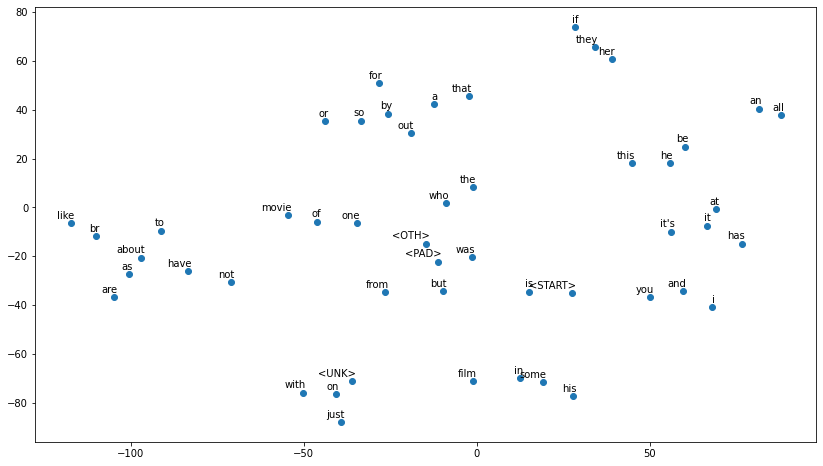

In [92]:
tsne = TSNE(perplexity=3, n_components=2, init='pca', n_iter=5000, method='exact')
np.set_printoptions(suppress=True)
plot_only = 50
T = tsne.fit_transform(embed_layer[:plot_only, :])
labels = [idx2word[i] for i in range(plot_only)]
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1])

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')

In [91]:
model2 = Sequential()
EMBED_SIZE = 100
# model.add()
model2.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model2.add(Dropout(0.2))
model2.add(LSTM(100, activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid',input_shape=(1,)))
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 500, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [94]:
history = model2.fit(preprocessed_train_data,
                    train_labels,
                    epochs=6,
                    batch_size=512,
                    validation_split=0.08,
                    verbose=1)

Epoch 1/6
45/45 [==============================] - 150s 3s/step - loss: 0.6578 - accuracy: 0.6732 - val_loss: 0.6019 - val_accuracy: 0.7430
Epoch 2/6
45/45 [==============================] - 146s 3s/step - loss: 0.3997 - accuracy: 0.8299 - val_loss: 0.3404 - val_accuracy: 0.8525
Epoch 3/6
45/45 [==============================] - 145s 3s/step - loss: 0.2403 - accuracy: 0.9058 - val_loss: 0.3011 - val_accuracy: 0.8780
Epoch 4/6
45/45 [==============================] - 145s 3s/step - loss: 0.1756 - accuracy: 0.9365 - val_loss: 0.3064 - val_accuracy: 0.8760
Epoch 5/6
45/45 [==============================] - 146s 3s/step - loss: 0.1359 - accuracy: 0.9544 - val_loss: 0.3292 - val_accuracy: 0.8740
Epoch 6/6
45/45 [==============================] - 147s 3s/step - loss: 0.1161 - accuracy: 0.9617 - val_loss: 0.3630 - val_accuracy: 0.8755


In [95]:
results = model2.evaluate(processed_test_data, test_labels)
print(results)

782/782 [==============================] - 69s 89ms/step - loss: 0.3751 - accuracy: 0.8704
[0.3751215934753418, 0.8704400062561035]


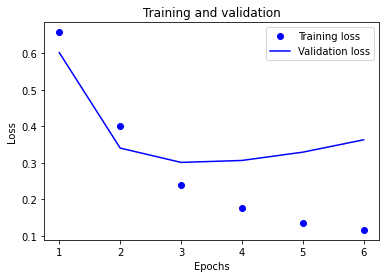

In [96]:
history_dict = history.history

# acc = history_dict['acc']
# val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Part C: Comparing Classification Models**

In [103]:
import keras
import tensorflow.keras as tk
import numpy as np
from keras.layers import Lambda, GlobalAveragePooling1D, Dense, Embedding
from keras import backend as K
from keras.models import Sequential
from keras.utils import pad_sequences
import matplotlib.pyplot as plt

In [104]:
imdb = tk.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [105]:
print("Training entires: {}, labels: {}".format(len(X_train), len(y_train)))

Training entires: 25000, labels: 25000


In [106]:
X_train[0:10]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [107]:
y_train[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [108]:
word_index = imdb.get_word_index()

In [109]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  
word_index["<UNUSED>"] = 3

In [110]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index[25]

'you'

In [111]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [112]:
decode_review(X_train[10])

"<START> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and <UNK> romance <UNK> on to the scene <UNK> <UNK> the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made <UNK> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <UNK> by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <UNK> sent to prison for fraud he is put in a cell with three others the quietly insane <UNK> body building <UNK> marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old <UNK> after <UNK> part of it they soon realise its magical powers and realise they may be able to use it

In [113]:
def OneHot(input_dim=None, input_length=None):
    
    if input_dim is None or input_length is None:
        raise TypeError("input_dim or input_length is not set")

    
    def _one_hot(x, num_classes):
        return K.one_hot(K.cast(x, 'uint8'),
                          num_classes=num_classes)

    return Lambda(_one_hot,
                  arguments={'num_classes': input_dim},
                  input_shape=(input_length,))

In [114]:
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 256

X_train_enc = pad_sequences(X_train, value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

X_test_enc = pad_sequences(X_test, value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [115]:
print(X_train_enc[1])
print('\nLength: ', len(X_train_enc))

[   1  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26
    4  715    8  118 1634   14  394   20   13  119  954  189  102    5
  207  110 3103   21   14   69  188    8   30   23    7    4  249  126
   93    4  114    9 2300 1523    5  647    4  116    9   35 8163    4
  229    9  340 1322    4  118    9    4  130 4901   19    4 1002    5
   89   29  952   46   37    4  455    9   45   43   38 1543 1905  398
    4 1649   26 6853    5  163   11 3215    2    4 1153    9  194  775
    7 8255    2  349 2637  148  605    2 8003   15  123  125   68    2
 6853   15  349  165 4362   98    5    4  228    9   43    2 1157   15
  299  120    5  120  174   11  220  175  136   50    9 4373  228 8255
    5    2  656  245 2350    5    4 9837  131  152  491   18    2   32
 7464 1212   14    9    6  371   78   22  625   64 1382    9    8  168
  145   23    4 1690   15   16    4 1355    5   28    6   52  154  462
   33   89   78  285   16  145   95    0    0    0    0    0    0    0
    0 

In [116]:
class GlobalAveragePooling1DMasked(GlobalAveragePooling1D):
    def call(self, x, mask=None):
        if mask != None:
            return K.sum(x, axis=1) / K.sum(mask, axis=1)
        else:
            return super().call(x)

In [117]:
model = Sequential()
model.add(OneHot(VOCAB_SIZE,input_length=MAX_SEQUENCE_LENGTH))
model.add(GlobalAveragePooling1DMasked())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 256, 10000)        0         
                                                                 
 global_average_pooling1d_ma  (None, 10000)            0         
 sked (GlobalAveragePooling1                                     
 DMasked)                                                        
                                                                 
 dense_2 (Dense)             (None, 16)                160016    
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [119]:
X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

y_val = np.array(y_train[:10000])
partial_y_train = np.array(y_train[10000:])

In [120]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 95s 3s/step - loss: 0.6922 - accuracy: 0.5764 - val_loss: 0.6910 - val_accuracy: 0.6589
Epoch 2/10
30/30 [==============================] - 81s 3s/step - loss: 0.6897 - accuracy: 0.6449 - val_loss: 0.6885 - val_accuracy: 0.6625
Epoch 3/10
30/30 [==============================] - 81s 3s/step - loss: 0.6867 - accuracy: 0.6718 - val_loss: 0.6854 - val_accuracy: 0.6675
Epoch 4/10
30/30 [==============================] - 87s 3s/step - loss: 0.6833 - accuracy: 0.6745 - val_loss: 0.6817 - val_accuracy: 0.6631
Epoch 5/10
30/30 [==============================] - 82s 3s/step - loss: 0.6791 - accuracy: 0.6810 - val_loss: 0.6777 - val_accuracy: 0.6768
Epoch 6/10
30/30 [==============================] - 82s 3s/step - loss: 0.6745 - accuracy: 0.6857 - val_loss: 0.6731 - val_accuracy: 0.6832
Epoch 7/10
30/30 [==============================] - 91s 3s/step - loss: 0.6694 - accuracy: 0.6855 - val_loss: 0.6683 - val_accuracy: 0.6834
Epoch 8/10
30/30 [==

In [121]:
results = model.evaluate(X_test_enc, y_test)

782/782 [==============================] - 112s 144ms/step - loss: 0.6512 - accuracy: 0.6922


In [122]:
print(results)
# loss,accuracy

[0.65118807554245, 0.6922000050544739]


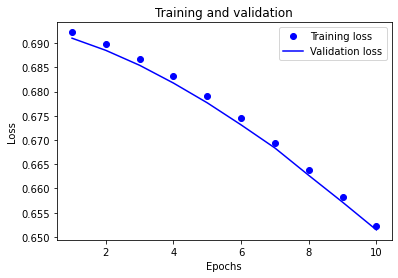

In [123]:
history_dict = history.history

# acc = history_dict['Loss']
# val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [124]:
VOCAB_SIZE= 10000
model2 = Sequential()
model2.add(Embedding(VOCAB_SIZE,16,input_length=MAX_SEQUENCE_LENGTH))
model2.add(GlobalAveragePooling1DMasked())
model2.add(Dense(16,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
print(model.summary())

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

history2 = model2.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

results = model2.evaluate(X_test_enc, y_test)
print(results)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 256, 10000)        0         
                                                                 
 global_average_pooling1d_ma  (None, 10000)            0         
 sked (GlobalAveragePooling1                                     
 DMasked)                                                        
                                                                 
 dense_2 (Dense)             (None, 16)                160016    
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
30/30 [=========================

In [125]:
results = model2.evaluate(X_test_enc, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4089 - accuracy: 0.8475


In [126]:
print (results)

[0.40890637040138245, 0.8475199937820435]


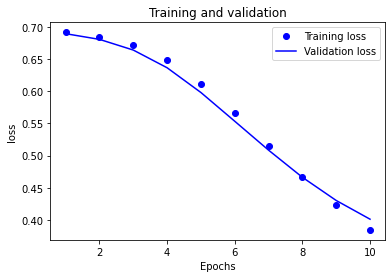

In [127]:
history_dict = history2.history

# acc = history_dict['acc']
# val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [128]:
def readGloveFile(gloveFile):
    with open(gloveFile, 'r') as f:
        wordToGlove = {}  
        wordToIndex = {}  
        indexToWord = {}  

        for line in f:
            record = line.strip().split()
            token = record[0] 
            wordToGlove[token] = np.array(record[1:], dtype=np.float64) 
            
        tokens = sorted(wordToGlove.keys())
        for idx, tok in enumerate(tokens):
            kerasIdx = idx + 1  
            wordToIndex[tok] = kerasIdx 
            indexToWord[kerasIdx] = tok 

    return wordToIndex, indexToWord, wordToGlove

In [129]:
def createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable):
    vocabLen = len(wordToIndex) + 1  
    embDim = next(iter(wordToGlove.values())).shape[0]  
   
    embeddingMatrix = np.zeros((vocabLen, embDim))  
    for word, index in wordToIndex.items():
        embeddingMatrix[index, :] = wordToGlove[word] 

    embeddingLayer = Embedding(vocabLen, embDim, embeddings_initializer=Constant(embeddingMatrix), trainable=isTrainable)
    return embeddingLayer

In [99]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip '/content/glove.6B.zip'

--2023-03-09 01:31:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-09 01:31:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-09 01:31:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [137]:
from keras.initializers import Constant
wordToIndex, indexToWord, wordToGlove = readGloveFile('/content/glove.6B.300d.txt')
embeddingLayer = createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable=True)

In [131]:
model3 = Sequential()
model3.add(embeddingLayer)
model3.add(GlobalAveragePooling1DMasked())
model3.add(Dense(16,activation='relu'))
model3.add(Dense(16,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         120000300 
                                                                 
 global_average_pooling1d_ma  (None, 300)              0         
 sked_2 (GlobalAveragePoolin                                     
 g1DMasked)                                                      
                                                                 
 dense_6 (Dense)             (None, 16)                4816      
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 120,005,405
Trainable params: 120,005,40

In [133]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

X_val = np.array(X_train_enc[:10000])
partial_X_train = np.array(X_train_enc[10000:])

history3 = model3.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

results = model3.evaluate(X_test_enc, y_test)
print(results)

Epoch 1/10
30/30 [==============================] - 59s 2s/step - loss: 0.6854 - accuracy: 0.5827 - val_loss: 0.6751 - val_accuracy: 0.6216
Epoch 2/10
30/30 [==============================] - 50s 2s/step - loss: 0.6595 - accuracy: 0.6635 - val_loss: 0.6395 - val_accuracy: 0.6895
Epoch 3/10
30/30 [==============================] - 50s 2s/step - loss: 0.6026 - accuracy: 0.7273 - val_loss: 0.5619 - val_accuracy: 0.7605
Epoch 4/10
30/30 [==============================] - 50s 2s/step - loss: 0.4993 - accuracy: 0.8015 - val_loss: 0.4530 - val_accuracy: 0.8258
Epoch 5/10
30/30 [==============================] - 50s 2s/step - loss: 0.3907 - accuracy: 0.8544 - val_loss: 0.3791 - val_accuracy: 0.8468
Epoch 6/10
30/30 [==============================] - 51s 2s/step - loss: 0.3164 - accuracy: 0.8794 - val_loss: 0.3338 - val_accuracy: 0.8676
Epoch 7/10
30/30 [==============================] - 51s 2s/step - loss: 0.2655 - accuracy: 0.8997 - val_loss: 0.3118 - val_accuracy: 0.8753
Epoch 8/10
30/30 [==

In [134]:
results = model3.evaluate(X_test_enc, y_test)
print(results)

782/782 [==============================] - 4s 5ms/step - loss: 0.3070 - accuracy: 0.8741
[0.3069949448108673, 0.8741199970245361]


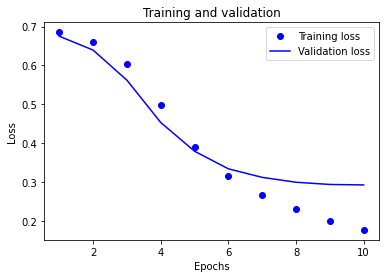

In [136]:
import matplotlib.pyplot as plt

history_dict = history3.history

# acc = history_dict['ac']
# val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Part D: Neural Machine Translation**

In [48]:
from keras.layers import Embedding,LSTM,Dropout,Dense,Layer, Multiply
from keras import Model,Input
from tensorflow.keras.utils import pad_sequences
from keras.optimizers import Adam
import keras.backend as K
from tensorflow.keras.utils import plot_model
import collections
import numpy as np
import time
import tensorflow as tf
from nltk.translate.bleu_score import corpus_bleu

In [49]:
class NmtModel(object):
  def __init__(self,source_dict,target_dict,use_attention):
    self.hidden_size = 200
    self.embedding_size = 100
    self.hidden_dropout_rate=0.2
    self.embedding_dropout_rate = 0.2
    self.batch_size = 100
    self.max_target_step = 30
    self.vocab_target_size = len(target_dict.vocab)
    self.vocab_source_size = len(source_dict.vocab)
    self.target_dict = target_dict
    self.source_dict = source_dict
    self.SOS = target_dict.word2ids['<start>']
    self.EOS = target_dict.word2ids['<end>']
    self.use_attention = use_attention
    print("source vocab: %d, target vocab:%d" % (self.vocab_source_size,self.vocab_target_size))

In [50]:
def build(self):
    source_words = Input(shape=(None,),dtype='int32')
    target_words = Input(shape=(None,), dtype='int32')
    
    # Encoder

    embedding_source = Embedding(input_dim=self.vocab_source_size, embeddings_initializer='random_uniform', mask_zero=True, output_dim=self.embedding_size,input_length=source_words.shape[1])
    source_words_embeddings = embedding_source(source_words)
    source_words_embeddings = Dropout(self.embedding_dropout_rate)(source_words_embeddings)
    encoder_lstm = LSTM(self.hidden_size,recurrent_dropout=self.hidden_dropout_rate,return_sequences=True,return_state=True)
    encoder_outputs,encoder_state_h,encoder_state_c = encoder_lstm(source_words_embeddings)

    embedding_target = Embedding(input_dim=self.vocab_target_size, embeddings_initializer='random_uniform', mask_zero=True, output_dim=self.embedding_size,input_length=target_words.shape[1])
    target_words_embeddings = embedding_target(target_words)
    target_words_embeddings = Dropout(self.embedding_dropout_rate)(target_words_embeddings)
    
    encoder_states = [encoder_state_h,encoder_state_c]

    decoder_lstm = LSTM(self.hidden_size,recurrent_dropout=self.hidden_dropout_rate,return_sequences=True,return_state=True)
    decoder_outputs_train,_,_ = decoder_lstm(target_words_embeddings,initial_state=encoder_states)

    if self.use_attention:
        decoder_attention = AttentionLayer()
        decoder_outputs_train = decoder_attention([encoder_outputs,decoder_outputs_train])

    decoder_dense = Dense(self.vocab_target_size,activation='softmax')
    decoder_outputs_train = decoder_dense(decoder_outputs_train)

    adam = Adam(lr=0.01,clipnorm=5.0)
    self.train_model = Model([source_words,target_words], decoder_outputs_train)
    self.train_model.compile(optimizer=adam,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    self.train_model.summary()
    plot_model(self.train_model, to_file='train_model.png')

    # Interface Model

    self.encoder_model = Model(source_words,[encoder_outputs,encoder_state_h,encoder_state_c])
    self.encoder_model.summary()
    plot_model(self.encoder_model, to_file='encoder_model.png')

    decoder_state_input_h = Input(shape=(self.hidden_size,))
    decoder_state_input_c = Input(shape=(self.hidden_size,))
    encoder_outputs_input = Input(shape=(None,self.hidden_size,))

    # Decoder

    decoder_state = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs_test,decoder_state_output_h,decoder_state_output_c = decoder_lstm(target_words_embeddings,initial_state=decoder_state)
    if self.use_attention:
        decoder_attention = AttentionLayer()
        decoder_outputs_test = decoder_attention([encoder_outputs_input,decoder_outputs_test])
    
    decoder_outputs_test = decoder_dense(decoder_outputs_test)

    self.decoder_model = Model([target_words,decoder_state_input_h,decoder_state_input_c,encoder_outputs_input],
                               [decoder_outputs_test,decoder_state_output_h,decoder_state_output_c])
    self.decoder_model.summary()
    plot_model(self.decoder_model, to_file='decoder_model.png')


In [51]:
def time_used(self, start_time):
    curr_time = time.time()
    used_time = curr_time-start_time
    m = used_time // 60
    s = used_time - 60 * m
    return "%d m %d s" % (m, s)

In [52]:
def train(self,train_data,dev_data,test_data, epochs):
    start_time = time.time()
    for epoch in range(epochs):
      print("Starting training epoch {}/{}".format(epoch + 1, epochs))
      epoch_time = time.time()
      source_words_train, target_words_train, target_words_train_labels = train_data

      self.train_model.fit([source_words_train,target_words_train],target_words_train_labels,batch_size=self.batch_size)

      print("Time used for epoch {}: {}".format(epoch + 1, self.time_used(epoch_time)))
      dev_time = time.time()
      print("Evaluating on dev set after epoch {}/{}:".format(epoch + 1, epochs))
      self.eval(dev_data)
      print("Time used for evaluate on dev set: {}".format(self.time_used(dev_time)))

    print("Training finished!")
    print("Time used for training: {}".format(self.time_used(start_time)))

    print("Evaluating on test set:")
    test_time = time.time()
    self.eval(test_data)
    print("Time used for evaluate on test set: {}".format(self.time_used(test_time)))

In [53]:
def get_target_sentences(self, sents,vocab,reference=False):
    str_sents = []
    num_sent, max_len = sents.shape
    for i in range(num_sent):
      str_sent = []
      for j in range(max_len):
        t = sents[i,j].item()
        if t == self.SOS:
          continue
        if t == self.EOS:
          break

        str_sent.append(vocab[t])
      if reference:
        str_sents.append([str_sent])
      else:
        str_sents.append(str_sent)
    return 

In [54]:
def eval(self, dataset):
    source_words, target_words_labels = dataset
    vocab = self.target_dict.vocab

    encoder_outputs, state_h,state_c = self.encoder_model.predict(source_words,batch_size=self.batch_size)
    predictions = []
    step_target_words = np.ones([source_words.shape[0],1]) * self.SOS
    for _ in range(self.max_target_step):
      step_decoder_outputs, state_h,state_c = self.decoder_model.predict([step_target_words,state_h,state_c,encoder_outputs],batch_size=self.batch_size)
      step_target_words = np.argmax(step_decoder_outputs,axis=2)
      predictions.append(step_target_words)

    candidates = self.get_target_sentences(np.concatenate(predictions,axis=1),vocab)
    references = self.get_target_sentences(target_words_labels,vocab,reference=True)
    print("candidates: ",' '.join(candidates[10]))
    print("references: ",' '.join(references[10][0]))
    score = corpus_bleu(references,candidates)
    print("Model BLEU score: %.2f" % (score*100.0))

In [55]:
class AttentionLayer(Layer):
  def compute_mask(self, inputs, mask=None):
    if mask == None:
      return None
    return mask[1]

  def compute_output_shape(self, input_shape):
    return (input_shape[1][0],input_shape[1][1],input_shape[1][2]*2)


  def call(self, inputs, mask=None):
    encoder_outputs, decoder_outputs = inputs
    
    # Attention
    
    luong_score = tf.matmul(decoder_outputs, encoder_outputs, transpose_b=True)    
    alignment = tf.nn.softmax(luong_score, axis=2)
    context = tf.matmul(K.expand_dims(alignment,axis=2), K.expand_dims(encoder_outputs,axis=1))
    encoder_vector = K.squeeze(context,axis=2)
    new_decoder_outputs = K.concatenate([decoder_outputs, encoder_vector])

    return new_decoder_outputs

In [56]:
class LanguageDict():
  def __init__(self, sents):
    word_counter = collections.Counter(tok.lower() for sent in sents for tok in sent)

    self.vocab = []
    self.vocab.append('<pad>') #zero paddings
    self.vocab.append('<unk>')
    self.vocab.extend([t for t,c in word_counter.items() if c > 10])

    self.word2ids = {w:id for id, w in enumerate(self.vocab)}
    self.UNK = self.word2ids['<unk>']
    self.PAD = self.word2ids['<pad>']

In [57]:
def load_dataset(source_path,target_path, max_num_examples=30000):
  source_lines = open(source_path).readlines()
  target_lines = open(target_path).readlines()
  assert len(source_lines) == len(target_lines)
  if max_num_examples > 0:
    max_num_examples = min(len(source_lines), max_num_examples)
    source_lines = source_lines[:max_num_examples]
    target_lines = target_lines[:max_num_examples]

  source_sents = [[tok.lower() for tok in sent.strip().split(' ')] for sent in source_lines]
  target_sents = [[tok.lower() for tok in sent.strip().split(' ')] for sent in target_lines]
  for sent in target_sents:
    sent.append('<end>')
    sent.insert(0,'<start>')

  source_lang_dict = LanguageDict(source_sents)
  target_lang_dict = LanguageDict(target_sents)

  unit = len(source_sents)//10

  source_words = [[source_lang_dict.word2ids.get(tok,source_lang_dict.UNK) for tok in sent] for sent in source_sents]
  source_words_train = pad_sequences(source_words[:8*unit],padding='post')
  source_words_dev = pad_sequences(source_words[8*unit:9*unit],padding='post')
  source_words_test = pad_sequences(source_words[9*unit:],padding='post')

  eos = target_lang_dict.word2ids['<end>']

  target_words = [[target_lang_dict.word2ids.get(tok,target_lang_dict.UNK) for tok in sent[:-1]] for sent in target_sents]
  target_words_train = pad_sequences(target_words[:8*unit],padding='post')

  target_words_train_labels = [sent[1:]+[eos] for sent in target_words[:8*unit]]
  target_words_train_labels = pad_sequences(target_words_train_labels,padding='post')
  target_words_train_labels = np.expand_dims(target_words_train_labels,axis=2)

  target_words_dev_labels = pad_sequences([sent[1:] + [eos] for sent in target_words[8 * unit:9 * unit]], padding='post')
  target_words_test_labels = pad_sequences([sent[1:] + [eos] for sent in target_words[9 * unit:]], padding='post')

  train_data = [source_words_train,target_words_train,target_words_train_labels]
  dev_data = [source_words_dev,target_words_dev_labels]
  test_data = [source_words_test,target_words_test_labels]

  return train_data,dev_data,test_data,source_lang_dict,target_lang_dict

In [59]:
import requests
def downloadfile(url):
  rq = requests.get(url)
  open(url.split('/')[-1], 'wb').write(rq.content)
downloadfile('https://raw.githubusercontent.com/Shakya-py/msc_ai_sem2/master/NN_NLP/Lab8-9_neural_machine_translation_with_attention/data.30.en')
downloadfile('https://raw.githubusercontent.com/Shakya-py/msc_ai_sem2/master/NN_NLP/Lab8-9_neural_machine_translation_with_attention/data.30.vi')

In [60]:
if __name__ == '__main__':
  max_example = 30000
  use_attention = True
  train_data, dev_data, test_data, source_dict, target_dict = load_dataset("data.30.vi","data.30.en",max_num_examples=max_example)
  print("read %d/%d/%d train/dev/test batches" % (len(train_data[0]),len(dev_data[0]), len(test_data[0])))

  model = NmtModel(source_dict,target_dict,use_attention)
  model.build()
  # plot_model(model, to_file='model.png')
  model.train(train_data,dev_data,test_data,10)

read 24000/3000/3000 train/dev/test batches
source vocab: 2034, target vocab:2506


AttributeError: ignored

# **Part E: Using Pre-trained BERT**

In [1]:
import requests
def downloadfile(url):
  rq = requests.get(url)
  open(url.split('/')[-1], 'wb').write(rq.content)
downloadfile('https://raw.githubusercontent.com/siat-nlp/MAMS-for-ABSA/master/data/MAMS-ATSA/raw/train.xml')
downloadfile('https://raw.githubusercontent.com/siat-nlp/MAMS-for-ABSA/master/data/MAMS-ATSA/raw/val.xml')
downloadfile('https://raw.githubusercontent.com/siat-nlp/MAMS-for-ABSA/master/data/MAMS-ATSA/raw/test.xml')
downloadfile('https://raw.githubusercontent.com/Shakya-py/msc_ai_sem2/master/NN_NLP/Lab11-12_dialogue_act_tagging/swda_all_data.csv')

In [37]:
import sklearn.metrics
import glob
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras import Model,Input
from keras.layers import Dropout, InputLayer, Bidirectional, TimeDistributed
from keras.layers import Activation, Embedding, Reshape, concatenate, Conv2D
from keras.layers import BatchNormalization, MaxPool2D, Flatten
from keras.optimizers import Adam

In [3]:
!unzip swda.zip

Archive:  swda.zip
replace swda/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/swda/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
f = glob.glob("swda/sw*/sw*.csv")
frames = []
for i in range(0, len(f)):
    frames.append(pd.read_csv(f[i]))

result = pd.concat(frames, ignore_index=True)
result.to_csv('swda_all_data.csv',index=False)

In [8]:
result = pd.read_csv('swda_all_data.csv')

In [9]:
print("Number of converations in the dataset:",len(result))

Number of converations in the dataset: 223606


In [10]:
reduced_df = result[['act_tag','text']]

In [11]:
import re
def damsl_act_tag(input):
        d_tags = []
        tags = re.split(r"\s*[,;]\s*", input)
        for tag in tags:
            if tag in ('qy^d', 'qw^d', 'b^m'): pass
            elif tag == 'nn^e': tag = 'ng'
            elif tag == 'ny^e': tag = 'na'
            else: 
                tag = re.sub(r'(.)\^.*', r'\1', tag)
                tag = re.sub(r'[\(\)@*]', '', tag)            
                if tag in ('qr', 'qy'):                         tag = 'qy'
                elif tag in ('fe', 'ba'):                       tag = 'ba'
                elif tag in ('oo', 'co', 'cc'):                 tag = 'oo_co_cc'
                elif tag in ('fx', 'sv'):                       tag = 'sv'
                elif tag in ('aap', 'am'):                      tag = 'aap_am'
                elif tag in ('arp', 'nd'):                      tag = 'arp_nd'
                elif tag in ('fo', 'o', 'fw', '"', 'by', 'bc'): tag = 'fo_o_fw_"_by_bc'            
            d_tags.append(tag)
        return d_tags[0]

In [12]:
reduced_df["act_tag"] = reduced_df["act_tag"].apply(lambda x: damsl_act_tag(x))

<ipython-input-12-3a505b615f58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df["act_tag"] = reduced_df["act_tag"].apply(lambda x: damsl_act_tag(x))


<AxesSubplot:xlabel='act_tag'>

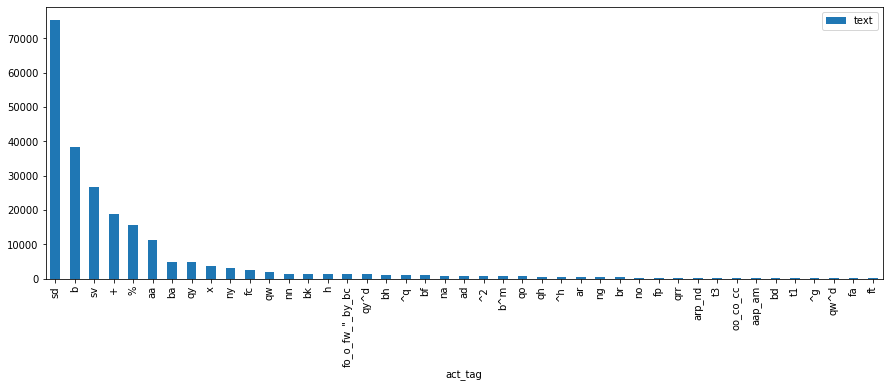

In [13]:
reduced_df.groupby(["act_tag"]).count().sort_values('text',ascending=False).plot.bar(figsize=(15,5))

In [14]:
reduced_df

,act_tag,text
0,qy,"{F Uh, } are you presently looking, {F uh, } f..."
1,ng,"{D Well, } as a matter of fact, I just bought ..."
2,b^m,Just bought one. /
3,sd,"[ Just, + just ] within the last three weeks. /"
4,%,"S-, - /"
...,...,...
223601,sd,"and I know they've, there's a lot of refinerie..."
223602,sv,"and that, that's some pretty potent stuff they..."
223603,sd,"I, but I don't know how, uh, you know, - /"
223604,sv,there's a difference in what you can smell and...


In [15]:
unique_tags = set()
for tag in reduced_df['act_tag']:
    unique_tags.add(tag)

In [16]:
one_hot_encoding_dic = pd.get_dummies(list(unique_tags))
tags_encoding = []
for i in range(0, len(reduced_df)):
    tags_encoding.append(one_hot_encoding_dic[reduced_df['act_tag'].iloc[i]])

In [17]:
sentences = []
for i in range(0, len(reduced_df)):
    sentences.append(reduced_df['text'].iloc[i].split(" "))

In [18]:
wordvectors = {}
index = 1
for s in sentences:
    for w in s:
        if w not in wordvectors:
            wordvectors[w] = index
            index += 1

In [20]:
MAX_LENGTH = len(max(sentences, key=len))

In [22]:
sentence_embeddings = []
for s in sentences:
    sentence_emb = []
    for w in s:
        sentence_emb.append(wordvectors[w])
    sentence_embeddings.append(sentence_emb)

In [23]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(sentence_embeddings, np.array(tags_encoding),shuffle=False)

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
train_sentences_X = pad_sequences(X_train, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(X_test, maxlen=MAX_LENGTH, padding='post')

In [25]:
train_sentences_X.shape,test_sentences_X.shape

((167704, 137), (55902, 137))

In [26]:
train_input = train_sentences_X[:140000]
val_input = train_sentences_X[140000:]

train_labels = y_train[:140000]
val_labels = y_train[140000:]

In [27]:
col_list = np.argmax(one_hot_encoding_dic.values.transpose(),axis = 1)
one_hot_encoding_dict = { j:i for i,j in  zip(col_list, one_hot_encoding_dic.columns) }

In [28]:
VOCAB_SIZE = len(wordvectors)
MAX_LENGTH = len(max(sentences, key=len))
EMBED_SIZE = 100
HIDDEN_SIZE = len(unique_tags) 

In [32]:
from keras.layers import Dropout, InputLayer, Bidirectional, TimeDistributed, Activation, Embedding
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=MAX_LENGTH))
model.add(Bidirectional(LSTM(HIDDEN_SIZE,return_sequences=True,recurrent_dropout=0.7)))
model.add(Bidirectional(LSTM(HIDDEN_SIZE,recurrent_dropout=0.7)))
model.add(Dense(HIDDEN_SIZE))
model.add(Activation('sigmoid'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 137, 100)          4373100   
                                                                 
 bidirectional (Bidirectiona  (None, 137, 86)          49536     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 86)               44720     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 43)                3741      
                                                                 
 activation (Activation)     (None, 43)                0         
                                                                 
Total params: 4,471,097
Trainable params: 4,471,097
No

In [33]:
history = model.fit(train_input,
                    train_labels,
                    epochs=3,
                    batch_size=256,
                    validation_data=(val_input, val_labels),
                    verbose=1)

Epoch 1/3
547/547 [==============================] - 697s 1s/step - loss: 1.5745 - accuracy: 0.5658 - val_loss: 1.2145 - val_accuracy: 0.6364
Epoch 2/3
547/547 [==============================] - 677s 1s/step - loss: 1.0892 - accuracy: 0.6801 - val_loss: 1.0446 - val_accuracy: 0.6868
Epoch 3/3
547/547 [==============================] - 683s 1s/step - loss: 0.9285 - accuracy: 0.7272 - val_loss: 0.9606 - val_accuracy: 0.7094


In [38]:
filter_sizes = [3,4,5]
num_filters = 64
drop = 0.2
VOCAB_SIZE = len(wordvectors) # 43,731
MAX_LENGTH = len(max(sentences, key=len))
EMBED_SIZE = 100 # arbitary
HIDDEN_SIZE = len(unique_tags) 

In [40]:
# CNN model
inputs = Input(shape=(MAX_LENGTH, ), dtype='int32')
embedding = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_SIZE, input_length=MAX_LENGTH)(inputs)
reshape = Reshape((MAX_LENGTH, EMBED_SIZE, 1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], EMBED_SIZE), strides=1, padding='valid', kernel_initializer='normal', activation='relu')(reshape)
bn_0 = BatchNormalization()(conv_0)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], EMBED_SIZE), strides=1, padding='valid', kernel_initializer='normal', activation='relu')(reshape)
bn_1 = BatchNormalization()(conv_1)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], EMBED_SIZE), strides=1, padding='valid', kernel_initializer='normal', activation='relu')(reshape)
bn_2 = BatchNormalization()(conv_2)

maxpool_0 = MaxPool2D(pool_size=(MAX_LENGTH - filter_sizes[0] + 1, 1), padding='valid')(bn_0)
maxpool_1 = MaxPool2D(pool_size=(MAX_LENGTH - filter_sizes[1] + 1, 1), padding='valid')(bn_1)
maxpool_2 = MaxPool2D(pool_size=(MAX_LENGTH - filter_sizes[2] + 1, 1), padding='valid')(bn_2)

concatenate_tensors = concatenate([maxpool_0, maxpool_1,maxpool_2],axis=-1)
flatten_concat = Flatten()(concatenate_tensors) 
dense_1 = Dense(units=HIDDEN_SIZE,input_shape=(1,),activation='relu')(flatten_concat) 
dropout_1 = Dropout(drop)(dense_1) 

In [42]:
time_xx = TimeDistributed(Dense(HIDDEN_SIZE))(concatenate_tensors)

_CNN_to_LSTM = Reshape((time_xx.shape[1]*time_xx.shape[2],int(time_xx.shape[3])),input_shape=time_xx.shape[1:4])(time_xx)
b1 = Bidirectional(LSTM(HIDDEN_SIZE, return_sequences=True))(_CNN_to_LSTM)
b2 = Bidirectional(LSTM(HIDDEN_SIZE))(b1)
dense_2 = Dense(HIDDEN_SIZE)(b2)
dropout_2 = Dropout(drop)(dense_2)

In [44]:
y = concatenate([dropout_1, dropout_2],axis = -1)
out = Dense(HIDDEN_SIZE)(y)
out = Activation('sigmoid')(out)
m = Model(inputs,out)
m.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'], )
m.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 137)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 137, 100)     4373100     ['input_2[0][0]']                
                                                                                                  
 reshape_1 (Reshape)            (None, 137, 100, 1)  0           ['embedding_3[0][0]']            
                                                                                                  
 conv2d_3 (Conv2D)              (None, 135, 1, 64)   19264       ['reshape_1[0][0]']              
                                                                                            

In [45]:
history = m.fit(train_input,
                    train_labels,
                    epochs=3,
                    batch_size=64,
                    validation_data=(val_input, val_labels),
                    verbose=1)

Epoch 1/3
2188/2188 [==============================] - 427s 190ms/step - loss: 1.4432 - accuracy: 0.6026 - val_loss: 1.2032 - val_accuracy: 0.6360
Epoch 2/3
2188/2188 [==============================] - 396s 181ms/step - loss: 1.1736 - accuracy: 0.6583 - val_loss: 1.0913 - val_accuracy: 0.6648
Epoch 3/3
2188/2188 [==============================] - 403s 184ms/step - loss: 1.0831 - accuracy: 0.6784 - val_loss: 1.0196 - val_accuracy: 0.6905
